## Preamble and Datasets

### step1: Based on the results from the features selection in 006

In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [2]:
X_train006 = pd.read_csv('X_train_Selection006.csv')

In [3]:
FeatureSelectedFrom006 =list(X_train006.columns)[1:]
FeatureSelectedFrom006

['BCUT_PEOE_1',
 'h_logS',
 'npr2',
 'PEOE_RPC.',
 'PEOE_VSA.1.1',
 'SMR_VSA3',
 'std_dim3',
 'vsurf_DD23',
 'vsurf_DW23',
 'vsurf_R']

## Step 2 : Adding the variables for a better model performance 

### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

sklearn.feature_selection.SelectKBest: Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

For regression: f_regression, mutual_info_regression


Feature selection with sparse data

If you use sparse data (i.e. data represented as sparse matrices),:
     mutual_info_regression will deal with the data without making it dense.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [5]:
data = pd.read_csv("Last-310Descriptors_all_diversifier_3.csv",sep=";")
data.head()

,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,a_base,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Ratios Ln,Ratios
0,113.767230,1000.23600,683.490170,315.32425,755.79987,244.43610,7,0,18,0,...,25.0,7.875,0.875,0,704.86896,10532,77,254,-2.04,0.130029
1,38.380379,511.26691,87.832047,422.87335,511.26691,0.00000,0,0,12,0,...,0.0,0.000,0.000,0,395.32700,650,35,100,-1.90,0.149569
2,38.509171,467.70377,46.270092,421.43369,164.71072,302.99304,1,0,0,0,...,0.0,0.000,0.000,0,423.76498,523,48,130,-1.86,0.155673
3,35.353966,476.31808,115.047930,359.88968,476.31808,0.00000,0,0,12,0,...,0.0,0.000,0.000,0,326.43698,502,28,88,-1.83,0.160414
4,42.889172,595.07001,66.461929,528.60809,595.07001,0.00000,0,0,12,0,...,0.0,0.000,0.000,0,643.58698,708,30,98,-1.70,0.182684


In [6]:
list(data.columns)[-2:]

['Ratios Ln', 'Ratios']

In [7]:
y = data['Ratios Ln']
y.head()

0   -2.04
1   -1.90
2   -1.86
3   -1.83
4   -1.70
Name: Ratios Ln, dtype: float64

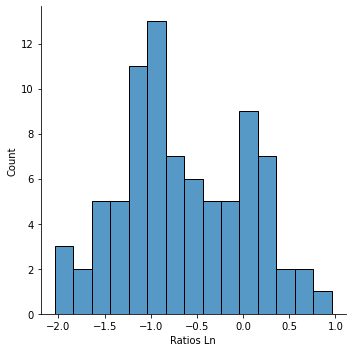

In [8]:
%matplotlib inline

sns.displot(data, x = "Ratios Ln",binwidth=0.2)

In [9]:
x = data.drop(['Ratios Ln', 'Ratios'], axis =1)
x.head()

,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,a_base,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,113.767230,1000.23600,683.490170,315.32425,755.79987,244.43610,7,0,18,0,...,191.625,58.000,25.0,7.875,0.875,0,704.86896,10532,77,254
1,38.380379,511.26691,87.832047,422.87335,511.26691,0.00000,0,0,12,0,...,53.750,0.000,0.0,0.000,0.000,0,395.32700,650,35,100
2,38.509171,467.70377,46.270092,421.43369,164.71072,302.99304,1,0,0,0,...,19.000,0.000,0.0,0.000,0.000,0,423.76498,523,48,130
3,35.353966,476.31808,115.047930,359.88968,476.31808,0.00000,0,0,12,0,...,41.375,0.000,0.0,0.000,0.000,0,326.43698,502,28,88
4,42.889172,595.07001,66.461929,528.60809,595.07001,0.00000,0,0,12,0,...,88.250,0.375,0.0,0.000,0.000,0,643.58698,708,30,98


In [26]:
#selecting the best 100 features based on univariate statistical tests.
#Using "mutual_info_regression" as the scoring function

bestSelect = SelectKBest(mutual_info_regression, k=6)
selector = bestSelect.fit(x, y)

In [27]:
feature_select = selector.get_support(indices=True)

In [28]:
X_bestkSelect = x[x.columns[feature_select]]
X_bestkSelect.head()

,a_ICM,h_ema,PEOE_VSA_FNEG,PEOE_VSA_FPOS,vsurf_D5,vsurf_D6
0,1.531109,14.044005,0.450831,0.549169,426.000,343.500
1,1.394617,1.789496,0.833095,0.166905,374.500,335.500
2,1.687941,3.573645,0.882079,0.117921,292.125,262.375
3,1.448576,1.259619,0.820857,0.179143,343.875,310.250
4,1.630983,2.461521,0.868358,0.131642,421.500,376.250


In [29]:
score_total = pd.DataFrame({"score":list(selector.scores_)}, x.columns)
score_total = score_total.sort_values(by=['score'],ascending = False)
bestSelect_scores = score_total.sort_values(by=['score'],ascending = False).iloc[:6,:]
bestSelect_scores

,score
vsurf_D6,0.391457
a_ICM,0.348773
h_ema,0.329139
PEOE_VSA_FNEG,0.324244
PEOE_VSA_FPOS,0.323832
vsurf_D5,0.321927


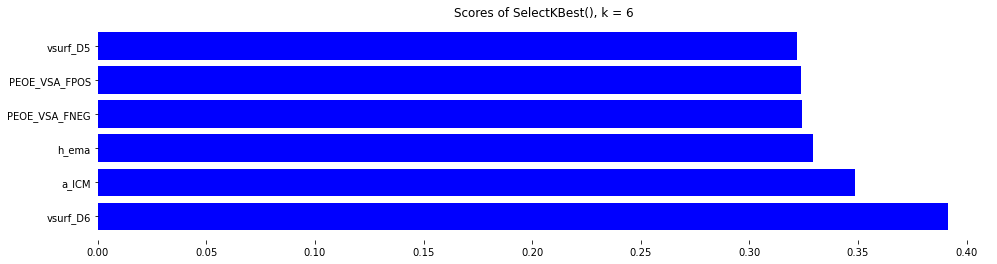

In [31]:
%matplotlib inline
plt.figure(figsize=(16,4))
plt.barh(list(bestSelect_scores.index), list(bestSelect_scores["score"]), color='b')
plt.title('Scores of SelectKBest(), k = 6')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig("Scores of SelectKBest_k = 6")

In [32]:
feature_adding = list(bestSelect_scores.index)
feature_adding 

['vsurf_D6', 'a_ICM', 'h_ema', 'PEOE_VSA_FNEG', 'PEOE_VSA_FPOS', 'vsurf_D5']

In [33]:
x_adding = x[feature_adding]
x_adding

,vsurf_D6,a_ICM,h_ema,PEOE_VSA_FNEG,PEOE_VSA_FPOS,vsurf_D5
0,343.500,1.531109,14.044005,0.450831,0.549169,426.000
1,335.500,1.394617,1.789496,0.833095,0.166905,374.500
2,262.375,1.687941,3.573645,0.882079,0.117921,292.125
3,310.250,1.448576,1.259619,0.820857,0.179143,343.875
4,376.250,1.630983,2.461521,0.868358,0.131642,421.500
...,...,...,...,...,...,...
78,204.000,0.999010,0.000000,0.682830,0.317170,254.000
79,2.500,1.931753,9.153351,0.790954,0.209046,7.250
80,217.375,0.991076,0.000000,0.732395,0.267605,260.375
81,186.125,1.000000,0.000000,0.700751,0.299249,238.500


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


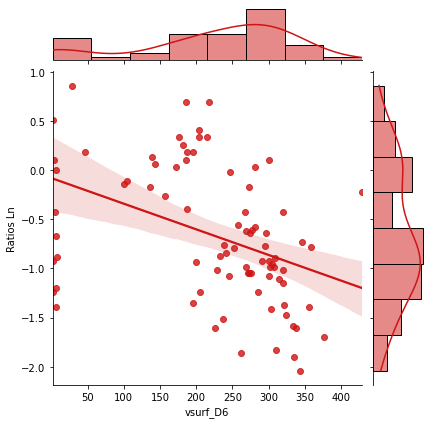

In [50]:
sns.jointplot(x_adding.iloc[:,0],
              y,
              kind="reg",
              color="#ce1414")
plt.savefig("vsurf_D6 & y")

In [34]:
data006 = pd.read_csv("fromR_datatidy_with_y.csv")

In [35]:
x_from006 = data006[FeatureSelectedFrom006]
x_from006

,BCUT_PEOE_1,h_logS,npr2,PEOE_RPC.,PEOE_VSA.1.1,SMR_VSA3,std_dim3,vsurf_DD23,vsurf_DW23,vsurf_R
0,-0.509120,-7.301610,0.865424,0.074369,235.035110,24.785706,1.623039,0.500000,0.500000,1.610714
1,-0.681715,-8.090596,0.919208,0.114688,219.328540,24.504246,1.137902,2.291288,2.291288,1.467669
2,-0.631661,-6.204517,0.935585,0.164711,147.909730,18.195690,1.228131,1.118034,0.500000,1.521332
3,-0.667396,-6.721433,0.927113,0.121353,172.419540,17.503033,0.912487,0.500000,0.500000,1.429877
4,-0.665789,-8.511435,0.827602,0.142438,0.000000,10.486856,0.994331,1.870829,3.240370,1.447858
...,...,...,...,...,...,...,...,...,...,...
78,-0.392376,-5.279293,0.713509,0.111591,61.274521,9.556724,0.423491,6.519202,6.519202,1.396001
79,-0.466827,-4.462789,0.956616,0.153789,0.000000,0.000000,0.863262,6.020797,5.545268,1.329116
80,-0.586864,-5.812396,0.757929,0.097090,110.294140,3.185575,0.242777,6.519202,6.519202,1.421345
81,-0.440078,-4.751402,0.827321,0.115845,73.529427,6.371150,0.365896,6.670832,6.670832,1.364408


In [36]:
X = pd.concat([x_from006,x_adding], axis=1)
X

,BCUT_PEOE_1,h_logS,npr2,PEOE_RPC.,PEOE_VSA.1.1,SMR_VSA3,std_dim3,vsurf_DD23,vsurf_DW23,vsurf_R,vsurf_D6,a_ICM,h_ema,PEOE_VSA_FNEG,PEOE_VSA_FPOS,vsurf_D5
0,-0.509120,-7.301610,0.865424,0.074369,235.035110,24.785706,1.623039,0.500000,0.500000,1.610714,343.500,1.531109,14.044005,0.450831,0.549169,426.000
1,-0.681715,-8.090596,0.919208,0.114688,219.328540,24.504246,1.137902,2.291288,2.291288,1.467669,335.500,1.394617,1.789496,0.833095,0.166905,374.500
2,-0.631661,-6.204517,0.935585,0.164711,147.909730,18.195690,1.228131,1.118034,0.500000,1.521332,262.375,1.687941,3.573645,0.882079,0.117921,292.125
3,-0.667396,-6.721433,0.927113,0.121353,172.419540,17.503033,0.912487,0.500000,0.500000,1.429877,310.250,1.448576,1.259619,0.820857,0.179143,343.875
4,-0.665789,-8.511435,0.827602,0.142438,0.000000,10.486856,0.994331,1.870829,3.240370,1.447858,376.250,1.630983,2.461521,0.868358,0.131642,421.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.392376,-5.279293,0.713509,0.111591,61.274521,9.556724,0.423491,6.519202,6.519202,1.396001,204.000,0.999010,0.000000,0.682830,0.317170,254.000
79,-0.466827,-4.462789,0.956616,0.153789,0.000000,0.000000,0.863262,6.020797,5.545268,1.329116,2.500,1.931753,9.153351,0.790954,0.209046,7.250
80,-0.586864,-5.812396,0.757929,0.097090,110.294140,3.185575,0.242777,6.519202,6.519202,1.421345,217.375,0.991076,0.000000,0.732395,0.267605,260.375
81,-0.440078,-4.751402,0.827321,0.115845,73.529427,6.371150,0.365896,6.670832,6.670832,1.364408,186.125,1.000000,0.000000,0.700751,0.299249,238.500


In [37]:
y

0    -2.04
1    -1.90
2    -1.86
3    -1.83
4    -1.70
      ... 
78    0.41
79    0.51
80    0.69
81    0.69
82    0.86
Name: Ratios Ln, Length: 83, dtype: float64

## step 3  outliers Detection

## Visualization--------PCA

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)

print(X.shape, X_pca.shape)

(83, 16) (83, 2)


## Plotting the PCA-transformed version of the dataset

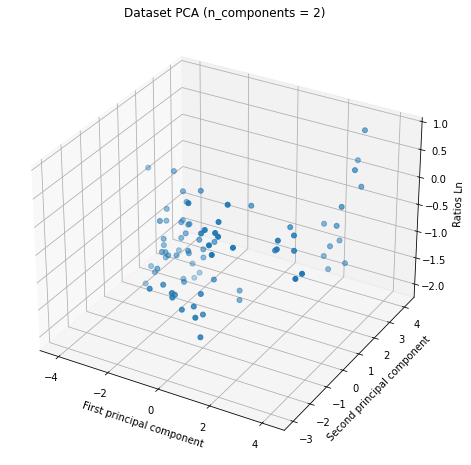

In [53]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],y,s=25)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Ratios Ln')
plt.title('Dataset PCA (n_components = 2)')
plt.savefig("PCA")


Number of potential outliers : 0 (0 %)

# DBSCAN clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
dbscan = DBSCAN(eps =5, min_samples = 2)

cls_findOutlier = dbscan.fit_predict(X_normalized)

print("Cluster membership values:\n{}".format(cls_findOutlier))



Cluster membership values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [56]:
unique, counts = np.unique(cls_findOutlier, return_counts=True)
dict(zip(unique, counts))

{0: 83}

### Different values of "eps" and "min_samples" were tested, no 'Cluster membership values' equals -1. 
### Therefore, no outliers need to be removed.

# Model training

In [58]:
#Create trrain-test split. training set/ test set = 80%/20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
X_train.head()

,BCUT_PEOE_1,h_logS,npr2,PEOE_RPC.,PEOE_VSA.1.1,SMR_VSA3,std_dim3,vsurf_DD23,vsurf_DW23,vsurf_R,vsurf_D6,a_ICM,PEOE_VSA_FPOS,PEOE_VSA_FNEG,h_ema,vsurf_D5
57,-0.687694,-12.304079,0.986164,0.145518,0.000000,10.486856,1.297009,7.262919,0.866025,1.578192,429.000,1.208830,0.082476,0.917524,3.396303,480.250
80,-0.586864,-5.812396,0.757929,0.097090,110.294140,3.185575,0.242777,6.519202,6.519202,1.421345,217.375,0.991076,0.267605,0.732395,0.000000,260.375
73,-0.627444,-3.417325,0.792161,0.163867,73.529427,0.000000,0.000575,0.707107,0.707107,1.347578,195.000,1.200910,0.355494,0.644506,0.566942,226.250
43,-0.641094,-5.805224,0.714243,0.220729,179.602310,19.245853,0.925130,6.344289,0.866025,1.416656,238.500,1.630983,0.241612,0.758388,1.880388,279.000
60,-0.567680,-2.032749,0.605244,0.248743,24.509808,6.371150,0.000301,0.707107,2.500000,1.255820,100.625,1.649397,0.423297,0.576703,3.412121,121.000


## Dummy ---------using Dummy as the baseline

In [108]:
from sklearn.dummy import DummyRegressor

In [109]:
dummy_regr = DummyRegressor(strategy="mean").fit(X_train, y_train)
print('R-squared test score for dummy: {:.3f}'
     .format(dummy_regr.score(X_train, y_train)))
print('R-squared test score for dommy: {:.3f}'
     .format(dummy_regr.score(X_test, y_test)))

R-squared test score for dummy: 0.000
R-squared test score for dommy: -0.034


## Decision Tree

In [59]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

min_samples_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70]
train_score_list = []
test_score_list = []

# create a regressor object 
for this_min_samples in min_samples_list:
    regressor = DecisionTreeRegressor(min_samples_split = this_min_samples,random_state = 0).fit(X_train, y_train)
    train_score = regressor.score(X_train,y_train)
    test_score = regressor.score(X_test,y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)

    print('min_samples_split = {}, \nr-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(this_min_samples,train_score, test_score))

min_samples_split = 2, 
r-squared training: 1.00, 
r-squared test: 0.44

min_samples_split = 3, 
r-squared training: 0.99, 
r-squared test: 0.30

min_samples_split = 4, 
r-squared training: 0.99, 
r-squared test: 0.31

min_samples_split = 5, 
r-squared training: 0.97, 
r-squared test: 0.32

min_samples_split = 6, 
r-squared training: 0.97, 
r-squared test: 0.40

min_samples_split = 7, 
r-squared training: 0.95, 
r-squared test: 0.36

min_samples_split = 8, 
r-squared training: 0.94, 
r-squared test: 0.38

min_samples_split = 9, 
r-squared training: 0.90, 
r-squared test: 0.35

min_samples_split = 10, 
r-squared training: 0.90, 
r-squared test: 0.35

min_samples_split = 15, 
r-squared training: 0.84, 
r-squared test: 0.37

min_samples_split = 20, 
r-squared training: 0.69, 
r-squared test: 0.31

min_samples_split = 25, 
r-squared training: 0.59, 
r-squared test: 0.55

min_samples_split = 30, 
r-squared training: 0.40, 
r-squared test: 0.45

min_samples_split = 35, 
r-squared training: 0

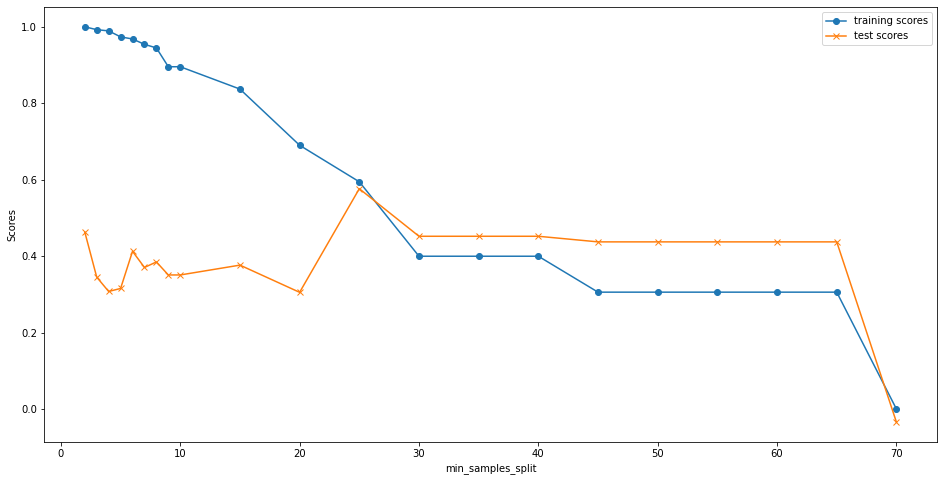

In [111]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(min_samples_list, train_score_list, '-o', label = "training scores")
plt.plot(min_samples_list, test_score_list, '-x',label ="test scores" )
plt.xlabel("min_samples_split")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [112]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

max_depth_list = [2,3,4,5,6,7,8]
train_score_list = []
test_score_list = []

# create a regressor object 
for this_max_depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth = this_max_depth,random_state = 0).fit(X_train, y_train)
    train_score = regressor.score(X_train,y_train)
    test_score = regressor.score(X_test,y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)

    print('max_depth = {}, \nr-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(this_max_depth,train_score, test_score))

max_depth = 2, 
r-squared training: 0.53, 
r-squared test: 0.62

max_depth = 3, 
r-squared training: 0.74, 
r-squared test: 0.25

max_depth = 4, 
r-squared training: 0.88, 
r-squared test: 0.41

max_depth = 5, 
r-squared training: 0.95, 
r-squared test: 0.48

max_depth = 6, 
r-squared training: 0.98, 
r-squared test: 0.47

max_depth = 7, 
r-squared training: 0.99, 
r-squared test: 0.52

max_depth = 8, 
r-squared training: 1.00, 
r-squared test: 0.43



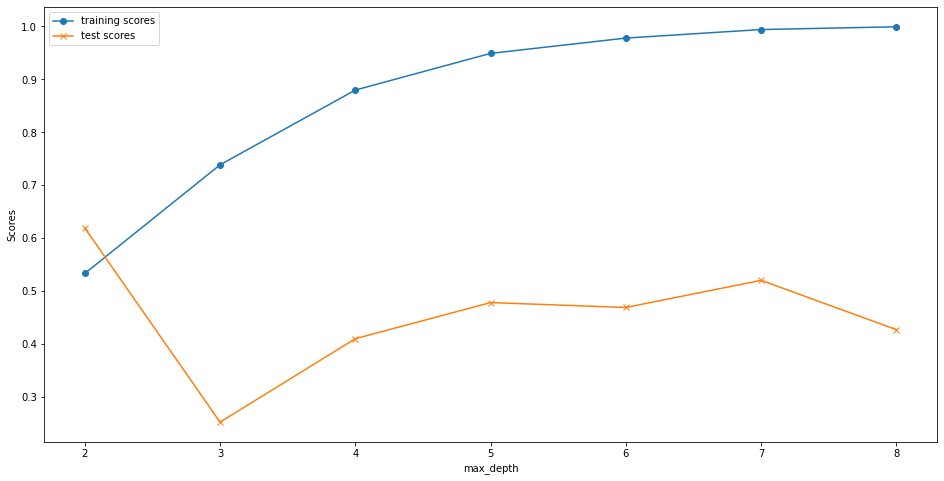

In [113]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(max_depth_list, train_score_list, '-o', label = "training scores")
plt.plot(max_depth_list, test_score_list, '-x',label ="test scores" )
plt.xlabel("max_depth")
plt.ylabel("Scores")
plt.legend()
plt.show()

### Cross-validation

In [61]:
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(min_samples_split = 40,random_state = 0)
    
cv_scores = cross_val_score(regressor,X_train,y_train,cv=5,scoring ="r2")
    

#print("mean R-squared score", np.mean(cv_scores))
cv_scores

array([-0.61431862,  0.23481932, -0.21908449,  0.17496846,  0.10538349])

In [114]:
from sklearn.model_selection import cross_val_score

min_samples_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,42,43,44,45]

cv_scores_mean = []

for this_min_samples in min_samples_list:
    regressor = DecisionTreeRegressor(min_samples_split = this_min_samples,random_state = 0)
    
    cv_scores = cross_val_score(regressor,X_train,y_train,cv=3,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.7022856460095447,
 -0.9332499365156225,
 -0.6333039974490883,
 -0.9338000098801619,
 -0.9072830518635117,
 -0.6193263603027112,
 -0.6409874597165112,
 -0.8118305194475067,
 -0.42403450547841404,
 -0.3369655605031218,
 -0.2475175254996921,
 -0.10270029271236099,
 0.02758239079670192,
 0.04710057098028938,
 0.04710057098028938,
 0.04710057098028938,
 0.04710057098028938,
 0.04710057098028938,
 -0.026477050809976903]

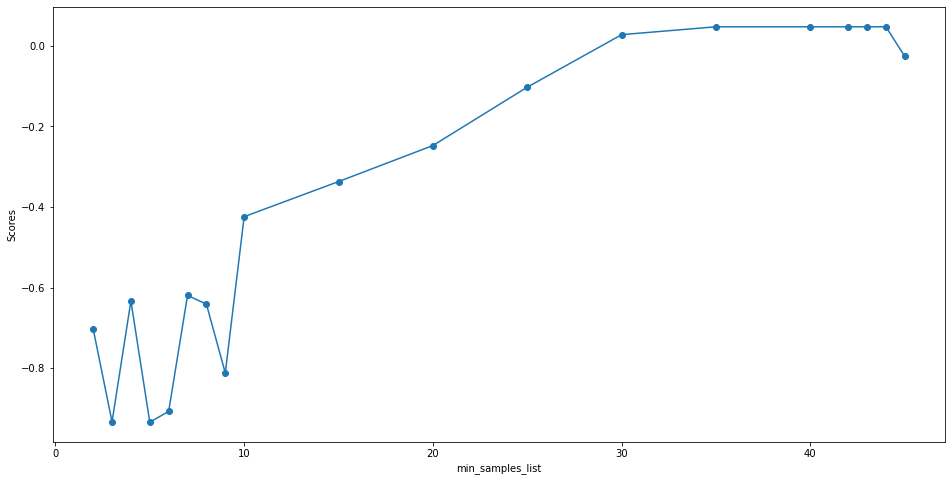

In [115]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(min_samples_list, cv_scores_mean, '-o')
plt.xlabel("min_samples_list")
plt.ylabel("Scores")
plt.show()

In [116]:
from sklearn.model_selection import cross_val_score

max_depth_list = [2,3,4,5,6,7,8]

cv_scores_mean = []

for this_max_depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth = this_max_depth,random_state = 0)
    
    cv_scores = cross_val_score(regressor,X_train,y_train,cv=3,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.2232876902772257,
 -0.5315339844719619,
 -0.6331595651437122,
 -0.6836884754817422,
 -0.7925518696358586,
 -0.6946255496246198,
 -0.9168397960379665]

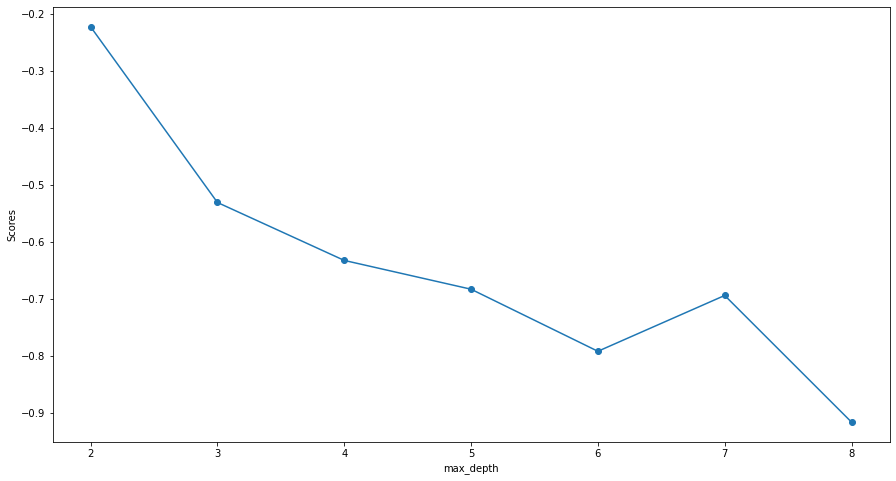

In [117]:
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.plot(max_depth_list, cv_scores_mean, '-o')
plt.xlabel("max_depth")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [165]:

from sklearn.tree import DecisionTreeRegressor  

# create a regressor object 

regressor = DecisionTreeRegressor(min_samples_split = 40,random_state = 0).fit(X_train, y_train)
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)
    
print('r-squared training: {:.3f}, \nr-squared test: {:.3f}\n'
         .format(train_score, test_score))

r-squared training: 0.400, 
r-squared test: 0.452



In [111]:
y_predict_test = regressor.predict(X_test)
y_predict_test

array([-0.565     , -0.146     , -1.13814815, -0.146     , -1.13814815,
       -1.13814815, -1.13814815, -0.146     , -0.565     , -1.13814815,
       -0.146     , -1.13814815, -0.146     , -0.146     , -0.146     ,
       -1.13814815, -0.146     ])

In [112]:
y_predict_train = regressor.predict(X_train)
y_predict_train

array([-0.565     , -0.146     , -0.146     , -0.565     , -0.146     ,
       -1.13814815, -0.565     , -0.565     , -0.146     , -0.146     ,
       -1.13814815, -1.13814815, -0.146     , -0.565     , -1.13814815,
       -1.13814815, -0.146     , -1.13814815, -1.13814815, -1.13814815,
       -0.146     , -1.13814815, -0.146     , -0.565     , -0.146     ,
       -0.146     , -0.565     , -0.146     , -0.146     , -1.13814815,
       -1.13814815, -0.565     , -1.13814815, -0.146     , -1.13814815,
       -0.146     , -0.146     , -0.146     , -0.146     , -1.13814815,
       -0.565     , -0.565     , -1.13814815, -1.13814815, -1.13814815,
       -0.146     , -1.13814815, -0.146     , -0.565     , -0.146     ,
       -1.13814815, -0.146     , -1.13814815, -1.13814815, -0.146     ,
       -1.13814815, -1.13814815, -0.146     , -1.13814815, -1.13814815,
       -1.13814815, -0.146     , -0.565     , -0.565     , -0.565     ,
       -1.13814815])

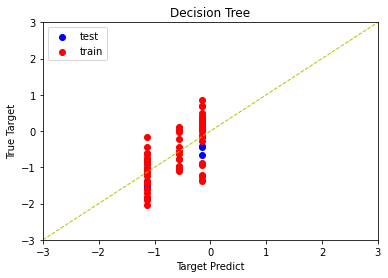

In [113]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Decision Tree')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## Random Forest

## Perform a grid search over the parameters 

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [127]:
regr = RandomForestRegressor()

grid_value = {'n_estimators': [10, 15,20,25],
              'max_depth':[2, 3, 4, 5, 6, 7, 8]}

grid_r2 = GridSearchCV(regr, param_grid = grid_value, scoring = "r2", cv = 3)
grid_r2.fit(X_train, y_train)
result = grid_r2.cv_results_
    
n_estimators10 = []
n_estimators15 =[]
n_estimators20 = []
n_estimators25 =[]
    
for m in [0,4,8,12,16,20,24]:
    n_estimators10.append(result["mean_test_score"][m])

    n_estimators15.append(result["mean_test_score"][m+1])

    n_estimators20.append(result["mean_test_score"][m+2])

    n_estimators25.append(result["mean_test_score"][m+3])
        
df_result = pd.DataFrame({"n_estimators10":n_estimators10, "n_estimators15":n_estimators15,
                          "n_estimators20":n_estimators20, "n_estimators25":n_estimators25}, 
                         index = ["max_depth 2", "max_depth 3","max_depth 4", "max_depth 5", "max_depth 6", "max_depth 7", "max_depth 8"] )
df_result

,n_estimators10,n_estimators15,n_estimators20,n_estimators25
max_depth 2,0.221240,0.239358,0.214771,0.261951
max_depth 3,0.172095,0.235437,0.195889,0.220344
max_depth 4,0.219720,0.169957,0.273615,0.275679
max_depth 5,0.263403,0.191213,0.233267,0.285240
max_depth 6,0.172318,0.225510,0.278094,0.288712
max_depth 7,0.182406,0.258659,0.340103,0.252478
max_depth 8,0.108477,0.207647,0.262238,0.262231


In [128]:
import seaborn as sns  # data visualization library

<AxesSubplot:>

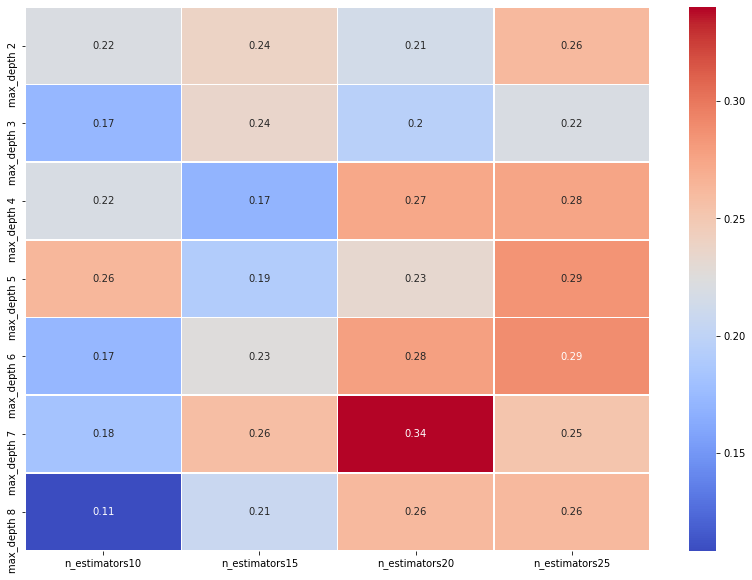

In [129]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Using the parameters which have the best performance

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
regr = RandomForestRegressor(max_depth=7, n_estimators = 20,random_state=0).fit(X_train, y_train)
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)

print('r-squared training: {:.3f}, \nr-squared test: {:.3f}\n'
         .format(train_score, test_score))

r-squared training: 0.870, 
r-squared test: 0.311



In [119]:
y_predict_test = regr.predict(X_test)
y_predict_test

array([-0.62849605, -0.48166411, -0.87116667, -0.07146805, -0.92242499,
       -0.73467499, -0.98507522, -0.24500139, -0.82226271, -0.497125  ,
       -0.27952222, -1.30405655, -0.47838772,  0.14139445, -0.20778355,
       -0.65146666, -1.2453    ])

In [120]:
y_predict_train = regr.predict(X_train)
y_predict_train

array([-0.3475    ,  0.41361667,  0.14634445, -0.67258771, -0.08722917,
       -0.75032939, -0.2418125 , -0.4645    ,  0.15102895,  0.21178194,
       -1.09829167, -1.38206488, -0.13121667, -0.67401666, -1.20292105,
       -0.77652939,  0.20465278, -0.50131786, -1.1648    , -1.08554606,
       -0.91905   , -1.60146667,  0.08566667, -0.8733377 , -0.15960022,
       -0.91289189, -0.98840677, -1.02935022, -0.09822917, -0.7456875 ,
       -1.220375  , -1.02765237, -0.58733334,  0.02625417, -1.70479167,
       -0.67214327,  0.25199999, -0.62304167, -0.33857638, -1.14656488,
       -0.89769844, -0.61851272, -0.89952203, -1.04027917, -0.95413751,
       -1.24563333, -1.5475    ,  0.3487    , -1.03542344,  0.327     ,
       -0.93767916, -0.71872522, -0.60073891, -0.91052499, -0.07396667,
       -0.45133333, -1.35316667,  0.05063611, -0.78341689, -1.00248593,
       -1.29666072,  0.23809978, -0.39913333, -0.2661    , -0.64899605,
       -0.99329606])

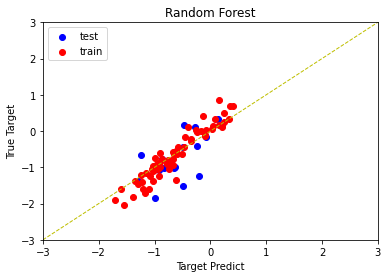

In [121]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Random Forest')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

# Linear models for regression

## Linear regression

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [123]:
linreg = LinearRegression().fit(X_train, y_train)
linreg_score_train = linreg.score(X_train, y_train)
linreg_score_test = linreg.score(X_test, y_test)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(str(linreg.intercept_)))
print('R-squared score (training): {:.3f}'.format(linreg_score_train))
print('R-squared score (test): {:.3f}'.format(linreg_score_test))


linear model coeff (w): [ 1.11149205e+00  4.59901225e-02  2.70341341e+00  6.95612372e+00
 -1.95741521e-03  2.11842769e-03 -7.94555506e-01  8.65545756e-02
  3.65919042e-02  8.81974082e-01 -1.89443355e-03  1.39052767e-02
  5.02167058e+06  5.02167067e+06  9.50313387e-02 -2.03320849e-03]
linear model intercept (b): -5021673.7795582935
R-squared score (training): 0.640
R-squared score (test): 0.251


### Cross-validation

In [63]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_scores = cross_val_score(linreg,X_train,y_train,cv=5,scoring ="r2")
print("mean R-squared score", np.mean(cv_scores))
cv_scores

mean R-squared score -0.032223114647338805


array([-0.86319164, -0.08141809,  0.0483091 ,  0.27496999,  0.46021506])

In [124]:
y_predict_test = linreg.predict(X_test)
y_predict_test

array([-0.77343154, -0.39236719, -0.74236873,  0.37643344, -1.02068901,
       -0.48097522, -0.89337283, -0.45383465, -0.78572744, -1.21590673,
       -0.35446092, -1.50229439, -0.24101492,  0.90341613,  0.10596113,
       -0.73179248, -1.28371279])

In [125]:
y_predict_train = linreg.predict(X_train)
y_predict_train

array([-0.74058846, -0.22553907, -0.09383156, -0.52152359,  0.21704962,
       -1.28267671,  0.28503666, -0.80553307,  0.16464314,  0.34672274,
       -1.37195551, -1.29772551,  0.11702193, -0.74295782, -0.88653728,
       -0.75335508,  0.17941755, -0.78454514, -1.12961881, -0.99872493,
        0.19360885, -1.47824755, -0.29708201, -0.90731758, -0.18561832,
       -0.65332901, -0.82488163, -1.11307537, -0.29845402, -1.30684487,
       -0.9512518 , -0.75347021, -1.20537518,  0.27669283, -1.37018974,
       -0.8593761 , -0.10084906, -0.40682733, -0.51756725, -1.52079116,
       -0.78347101, -0.53729024, -0.61047127, -0.6962696 , -0.87915655,
       -0.99792263, -1.43285119,  0.30789352, -0.79068306,  0.25834182,
       -0.67792259, -0.55856695, -1.05631616, -1.20871648, -0.26996966,
       -0.54025798, -1.53931701,  0.39905082, -0.9665637 , -1.23794827,
       -1.78737888,  0.08161269, -0.02756955, -0.49568947, -0.41953825,
       -1.217561  ])

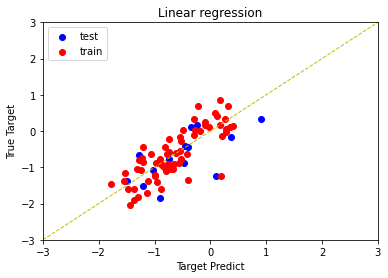

In [126]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Linear regression')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## Ridge regression with feature normalization

### Cross-validation

In [149]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha1 =  [0, 0.01, 0.1, 0.25, 0.5, 1]
cv_scores_mean1 = []
for this_alpha in my_alpha1:
    linridge = Ridge(alpha=this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(linridge,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean1.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean1

[-0.03500302171354086,
 0.05613701747066737,
 0.176506484426877,
 0.2255957904052658,
 0.24835867053179098,
 0.25650189006047086]

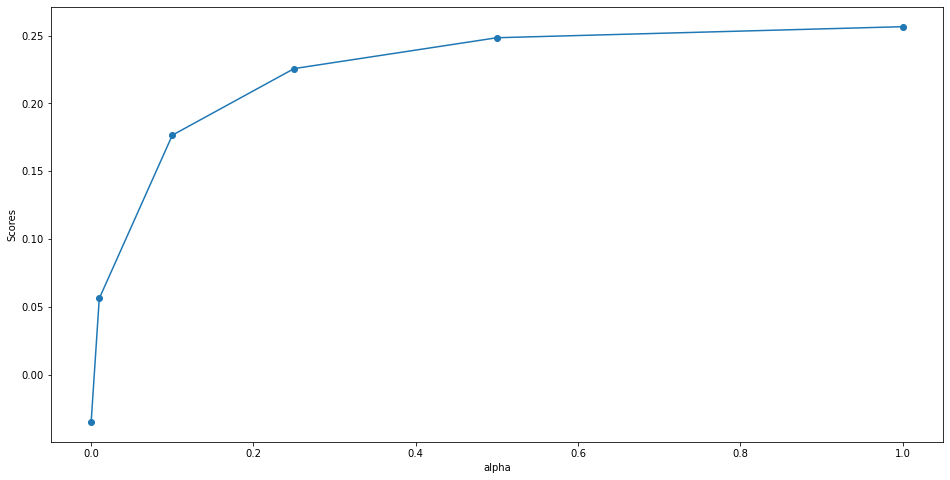

In [150]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha1, cv_scores_mean1, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

In [151]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha2 =  [1, 1.1,1.2, 1.25, 1.5, 1.75, 2, 3,4, 5]
cv_scores_mean2 = []
for this_alpha in my_alpha2:
    linridge = Ridge(alpha=this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(linridge,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean2.append(np.mean(cv_scores))
cv_scores_mean2

[0.25650189006047086,
 0.2565685262068947,
 0.25641396248310777,
 0.25627029520189754,
 0.25506542075450733,
 0.25330606374558157,
 0.25120344807416817,
 0.2411641977400433,
 0.23022641634394597,
 0.21924498208579796]

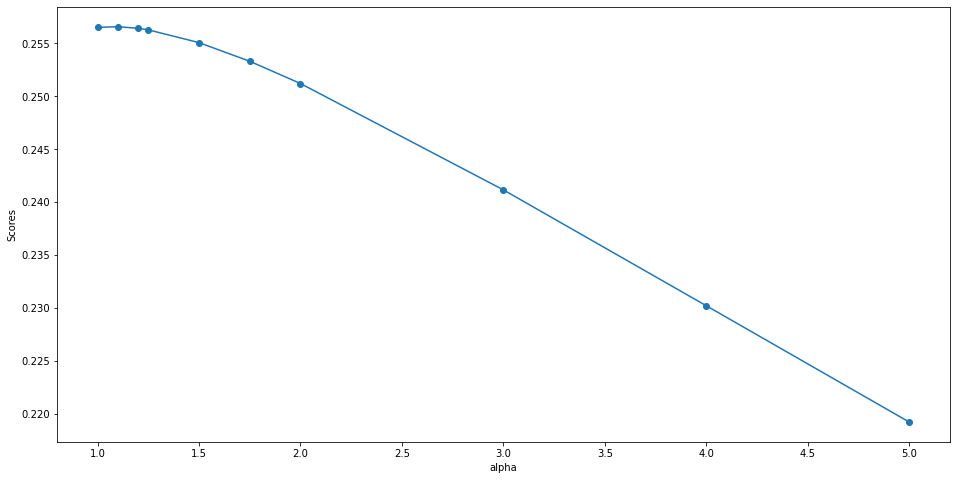

In [152]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha2, cv_scores_mean2, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [128]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=1.1, max_iter = 20000).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: -0.7738960819595233
ridge regression linear model coeff:
[ 0.28481652  0.2346926   0.452188    0.65823168 -0.19004485 -0.19537528
 -0.55431891  0.57033213  0.24125505 -0.31709843 -0.2943468   0.22408414
 -0.24353396  0.24353406  0.06525298 -0.33770239]
R-squared score (training): 0.562
R-squared score (test): 0.404
Number of non-zero features: 16


In [129]:
y_predict_test = linridge.predict(X_test_scaled)
y_predict_test

array([-0.81088851, -0.53432447, -1.00952799,  0.04287597, -0.82735416,
       -0.61274682, -1.09516656, -0.46264959, -0.62527845, -1.0522634 ,
       -0.45473269, -1.23362254, -0.43759155,  0.37396744,  0.0028609 ,
       -0.70971177, -0.90827445])

In [130]:
y_predict_train = linridge.predict(X_train_scaled)
y_predict_train

array([-0.91570008, -0.1915766 , -0.21798336, -0.41368906,  0.21124113,
       -1.13222756, -0.09185627, -0.71629485, -0.17922418,  0.30846388,
       -0.98366707, -1.13707789, -0.05903762, -0.84589959, -0.92760944,
       -0.73516329,  0.11136955, -0.78710302, -0.93013301, -0.95794473,
       -0.07182568, -1.39496694, -0.59350871, -0.84791609, -0.39556667,
       -0.42371748, -0.65680284, -0.75295719, -0.02950911, -1.0845858 ,
       -1.20682248, -0.60422461, -1.09732237,  0.13300192, -1.25875198,
       -0.79641707, -0.08963815, -0.22498064, -0.67803251, -1.25234179,
       -0.64315161, -0.57647611, -0.79423534, -0.85571614, -0.8941582 ,
       -0.84407617, -1.50988612,  0.11764841, -0.58687033,  0.04183136,
       -0.83541411, -0.61516207, -0.88746931, -0.93282663, -0.30942274,
       -0.76021043, -1.39953206, -0.08587122, -1.10043164, -1.15416341,
       -1.37533203,  0.19164801, -0.2298386 , -0.75042383, -0.60202709,
       -0.98043339])

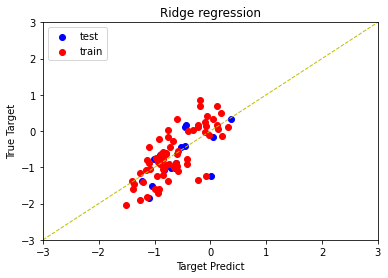

In [131]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Ridge regression')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## Lasso regression

## Cross-validation

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha1 =  [0.0001, 0.001,0.002,0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
cv_scores_mean1 = []

for this_alpha in my_alpha1:
    lasso = Lasso(alpha = this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(lasso,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean1.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean1

[-0.04200806331974918,
 0.13489151885783807,
 0.19510676388601028,
 0.22345747218573875,
 0.20750292861308633,
 0.18797199084784122,
 0.16435659604066646,
 0.148706613191886,
 0.13821883029235243,
 0.06171040715601124]

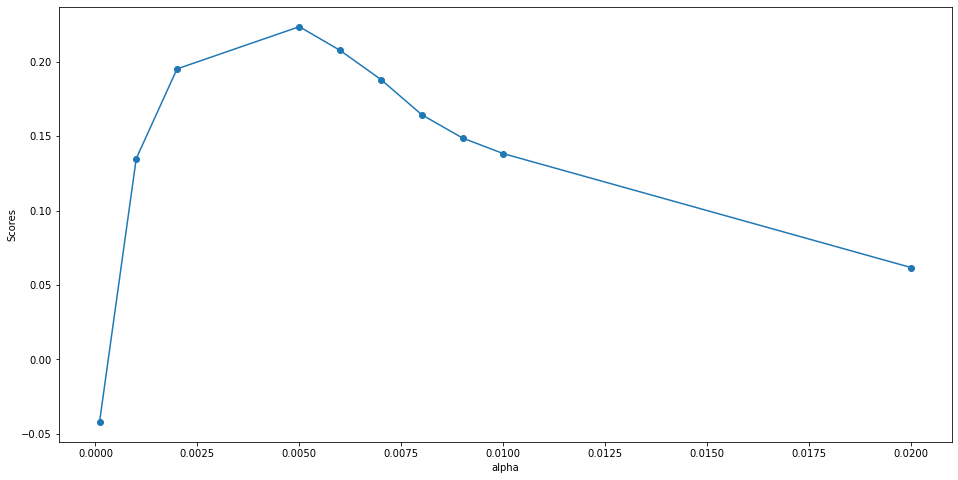

In [155]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha1, cv_scores_mean1, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [133]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.005, max_iter = 20000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train.columns), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: -0.7651282787964945
lasso regression linear model coeff:
[ 4.29340497e-01  1.38186575e-01  7.96018745e-01  1.07657682e+00
 -2.01453499e-01 -0.00000000e+00 -1.09453540e+00  6.19221471e-01
  2.87665714e-01 -1.54668893e-01 -0.00000000e+00  9.10532012e-03
 -7.42094092e-01  2.20141836e-06  0.00000000e+00 -0.00000000e+00]
Non-zero features: 12
R-squared score (training): 0.585
R-squared score (test): 0.426

Features with non-zero weight (sorted by absolute magnitude):
	std_dim3, -1.095
	PEOE_RPC., 1.077
	npr2, 0.796
	PEOE_VSA_FNEG, -0.742
	vsurf_DD23, 0.619
	BCUT_PEOE_1, 0.429
	vsurf_DW23, 0.288
	PEOE_VSA.1.1, -0.201
	vsurf_R, -0.155
	h_logS, 0.138
	a_ICM, 0.009
	PEOE_VSA_FPOS, 0.000


In [134]:
y_predict_test = linlasso.predict(X_test_scaled)
y_predict_test

array([-0.86850467, -0.56082244, -0.81016761,  0.16079247, -0.86106667,
       -0.57043867, -1.1314001 , -0.57784909, -0.7089413 , -1.23681393,
       -0.18471487, -1.25453026, -0.50541664,  0.68591093,  0.04617916,
       -0.72716947, -0.92135509])

In [135]:
y_predict_train = linlasso.predict(X_train_scaled)
y_predict_train

array([-0.74839018, -0.15451891, -0.10297884, -0.38602395,  0.33955533,
       -1.04028789, -0.04425739, -0.7471571 , -0.18825291,  0.33848974,
       -0.99928746, -1.1555404 ,  0.01508423, -0.85245228, -0.96331075,
       -0.71191904,  0.12450642, -0.87458523, -0.98867039, -1.0641416 ,
       -0.0046915 , -1.37754296, -0.58394159, -0.88858692, -0.40972363,
       -0.39505473, -0.70539393, -0.78139416, -0.17035451, -1.07469017,
       -1.19976986, -0.60936976, -1.13800628,  0.19971655, -1.24557556,
       -0.8995447 , -0.16750212, -0.33737607, -0.81142573, -1.27297511,
       -0.7036229 , -0.62460912, -0.63630963, -0.78677816, -0.82069972,
       -0.87636223, -1.53247312,  0.22599436, -0.6366842 ,  0.05341937,
       -0.78216699, -0.65061468, -1.00485501, -1.01285341, -0.38991197,
       -0.5493944 , -1.461589  ,  0.03699946, -1.07230526, -1.22001265,
       -1.50526395,  0.16146992, -0.13005358, -0.66753685, -0.54449872,
       -1.08194619])

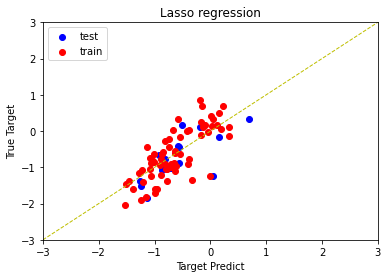

In [136]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Lasso regression')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## ElasticNet
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [138]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [158]:
elastic = ElasticNet()

grid_value = {'l1_ratio': [0.1, 0.3,0.5,0.7,0.9],
              'alpha':[0.01, 0.02, 0.03, 0.05,0.07,0.08, 0.9]}


grid_r2 = GridSearchCV(elastic, param_grid = grid_value, scoring = "r2", cv = 3)
grid_r2.fit(X_train_scaled, y_train)
result = grid_r2.cv_results_

l1_ratio_01 = []
l1_ratio_03 = []
l1_ratio_05 = []
l1_ratio_07 = []
l1_ratio_09 = []
    
for m in [0,5,9,13,17,21,25]:
    l1_ratio_01.append(result["mean_test_score"][m])
    l1_ratio_03.append(result["mean_test_score"][m+1])
    l1_ratio_05.append(result["mean_test_score"][m+2])
    l1_ratio_07.append(result["mean_test_score"][m+3])
    l1_ratio_09.append(result["mean_test_score"][m+4])
        
df_result = pd.DataFrame({"l1_ratio_01":l1_ratio_01, "l1_ratio_03":l1_ratio_03,
                         "l1_ratio_05":l1_ratio_05,"l1_ratio_07":l1_ratio_07,"l1_ratio_09":l1_ratio_09}, 
                         index = ["alpha 0.01", "alpha 0.02","alpha 0.03","alpha 0.05", "alpha 0.07","alpha 0.08","alpha 0.09"] )
df_result

,l1_ratio_01,l1_ratio_03,l1_ratio_05,l1_ratio_07,l1_ratio_09
alpha 0.01,0.339757,0.338270,0.325166,0.307436,0.298288
alpha 0.02,0.326461,0.301410,0.280214,0.251208,0.221270
alpha 0.03,0.221270,0.312258,0.280315,0.240212,0.201894
alpha 0.05,0.201894,0.164517,0.295636,0.240468,0.175344
alpha 0.07,0.175344,0.113453,0.068538,0.278599,0.199482
alpha 0.08,0.199482,0.115604,0.050824,-0.007026,0.269557
alpha 0.09,0.269557,0.180355,0.091892,0.016598,-0.019674


In [159]:
import seaborn as sns  # data visualization library

<AxesSubplot:>

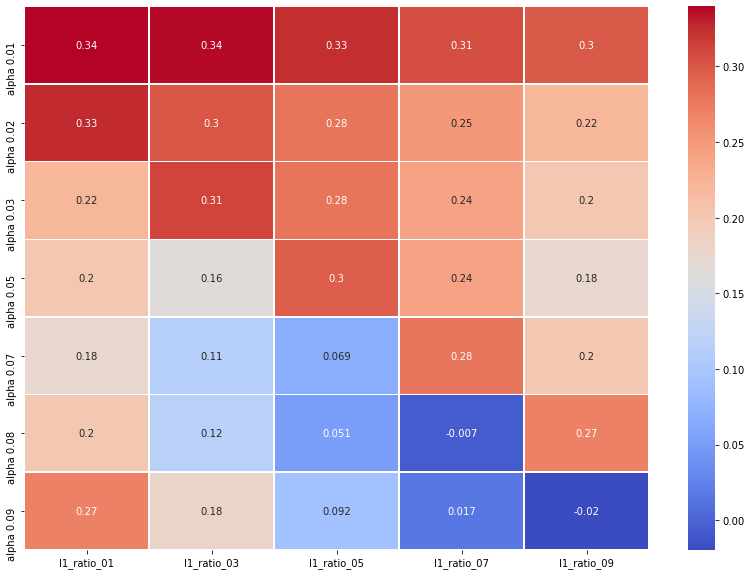

In [160]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Using the parameters which have the best performance

In [139]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic = ElasticNet(l1_ratio = 0.02, alpha = 0.01, random_state=0).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(elastic.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(elastic.score(X_test_scaled, y_test)))


R-squared score (training): 0.581
R-squared score (test): 0.405


In [140]:
y_predict_test = elastic.predict(X_test_scaled)
y_predict_test

array([-0.82919231, -0.54480419, -0.9650837 ,  0.11686735, -0.85155232,
       -0.59263523, -1.09661465, -0.46552053, -0.64081447, -1.11081373,
       -0.4074029 , -1.24692225, -0.4192445 ,  0.48420987,  0.03355548,
       -0.7144208 , -0.96068151])

In [141]:
y_predict_train = elastic.predict(X_train_scaled)
y_predict_train

array([-0.89659745, -0.17230191, -0.16829297, -0.39857146,  0.25969785,
       -1.1723344 , -0.01262008, -0.71136494, -0.15309463,  0.35673717,
       -1.03197844, -1.14978185, -0.02591258, -0.85318437, -0.92309054,
       -0.73595102,  0.13854512, -0.7912701 , -0.96656865, -0.97319342,
       -0.03255074, -1.41378842, -0.57624216, -0.85940272, -0.38944477,
       -0.43299098, -0.6683562 , -0.78838609, -0.05296787, -1.11183251,
       -1.21240275, -0.60683803, -1.12816004,  0.1778761 , -1.27883372,
       -0.84258181, -0.09880103, -0.26108577, -0.68913611, -1.26595609,
       -0.66655152, -0.58531667, -0.75480437, -0.84545125, -0.89193537,
       -0.89260429, -1.51770221,  0.18003547, -0.61439856,  0.07397168,
       -0.82863549, -0.63894424, -0.9147153 , -0.97605203, -0.28171273,
       -0.70159542, -1.46490329, -0.01046071, -1.09960703, -1.17971717,
       -1.43858687,  0.195433  , -0.18729076, -0.72504214, -0.58798099,
       -1.02242131])

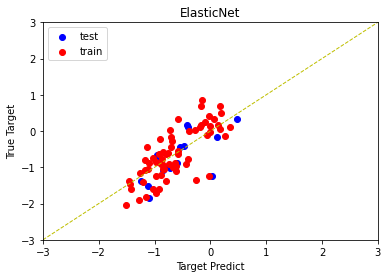

In [142]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('ElasticNet')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## Partial least squares

### Cross Validation

In [143]:
from sklearn.cross_decomposition import PLSRegression

In [166]:
my_n_component =  [2,3,4,5,6]
cv_scores_mean = []

for this_n in my_n_component:
    plsReg = PLSRegression(n_components=this_n)
    cv_scores = cross_val_score(plsReg,X_train,y_train,cv=5,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[0.18597381168051247,
 0.22105360862044318,
 0.17187510492230232,
 0.12111703348575956,
 0.13544708376443948]

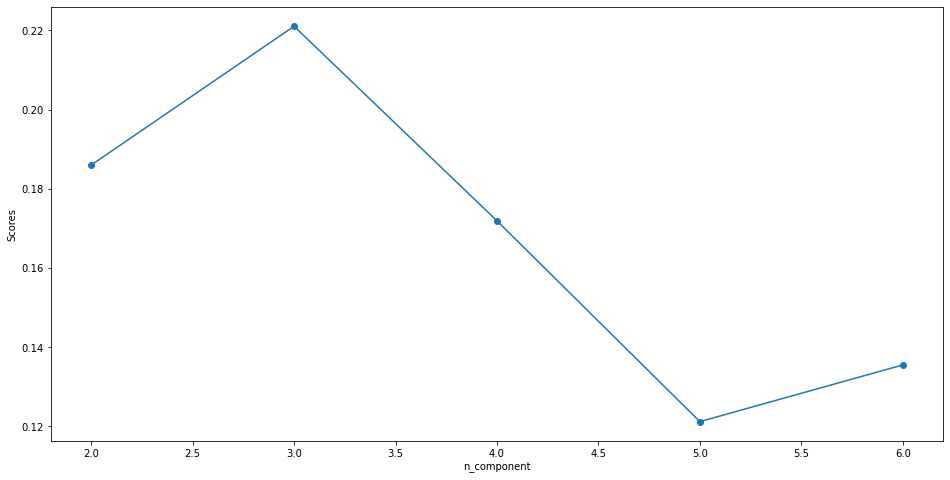

In [167]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_n_component, cv_scores_mean, '-o')
plt.xlabel("n_component")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [145]:
plsReg = PLSRegression(n_components=3).fit(X_train,y_train)

print('R-squared score (training): {:.3f}'
     .format(plsReg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(plsReg.score(X_test, y_test)))

R-squared score (training): 0.545
R-squared score (test): 0.362


In [150]:
y_predict_test = plsReg.predict(X_test)
#y_predict_test

In [149]:
y_predict_train = plsReg.predict(X_train)
#y_predict_train

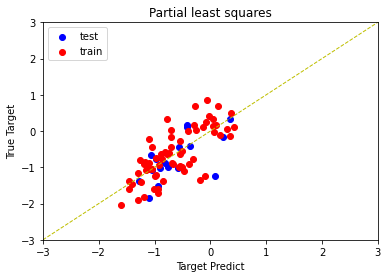

In [148]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Partial least squares')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

## Polynomial regression

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [170]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
myDegrees = [1,2,3,4]

r2_train = np.zeros((4,))
r2_test = np.zeros((4,))

for i in range(len(myDegrees)):
    poly = PolynomialFeatures(degree = myDegrees[i])      
    X_train_poly = poly.fit_transform(X_train_scaled)
    reg = LinearRegression().fit(X_train_poly, y_train)
    
    X_test_ploy = poly.fit_transform(X_test_scaled)                        
    r2_test[i] =  reg.score(X_test_ploy, y_test)
             
    r2_train[i] = reg.score(X_train_poly, y_train)

df_score = pd.DataFrame({"Training Scores": list(r2_train),
                        "Test Scores": list(r2_test)}, index = myDegrees)
    
df_score

,Training Scores,Test Scores
1,0.634591,0.196939
2,1.000000,-16.344596
3,1.000000,-8.882067
4,1.000000,-6.666428


### Conclusion: Polynomial regression model did not performe well (overfitting).

## Neural networks: Regression

In [151]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Cross validation

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
regr = mlpreg = MLPRegressor(hidden_layer_sizes = [2],
                             solver = 'lbfgs',
                              max_iter = 20000)

grid_value = {'activation': ['tanh', 'relu'],
              'alpha':[0.1, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]}

grid_r2 = GridSearchCV(regr, param_grid = grid_value, scoring = "r2", cv = 5)
grid_r2.fit(X_train, y_train)
result = grid_r2.cv_results_
    
tanh = []
relu =[]

    
for m in [0,2,4,6,8,10,12,14,16]:
    tanh.append(result["mean_test_score"][m])

    relu.append(result["mean_test_score"][m+1])

        
df_result = pd.DataFrame({"tanh":tanh, "relu":relu}, 
                         index = ["alpha 0.1", "alpha 1.0", "alpha 2.0", "alpha 5.0", "alpha 6.0", "alpha 7.0",
                                 "alpha 8.0", "alpha 9.0", "alpha 10"] )
df_result

,tanh,relu
alpha 0.1,-0.065470,0.047097
alpha 1.0,0.082335,-0.007787
alpha 2.0,0.025269,0.076346
alpha 5.0,0.025254,0.015955
alpha 6.0,-0.102244,0.013271
alpha 7.0,0.138753,-0.137567
alpha 8.0,0.018095,0.091727
alpha 9.0,0.021960,0.086403
alpha 10,0.145424,-0.047904


In [153]:
mlpreg = MLPRegressor(hidden_layer_sizes = [2],
                             activation = "tanh",
                             alpha = 10,
                             solver = 'lbfgs',
                              max_iter = 20000).fit(X_train_scaled, y_train)
train_score = mlpreg.score(X_train_scaled,y_train)
test_score =  mlpreg.score(X_test_scaled,y_test)

print('R-squared score (training): {:.3f}'
     .format(train_score))
print('R-squared score (test): {:.3f}'
     .format(test_score))

R-squared score (training): 0.220
R-squared score (test): 0.145


In [154]:
y_predict_test = mlpreg.predict(X_test_scaled)
#y_predict_test

In [155]:
y_predict_train = mlpreg.predict(X_train_scaled)
#y_predict_train

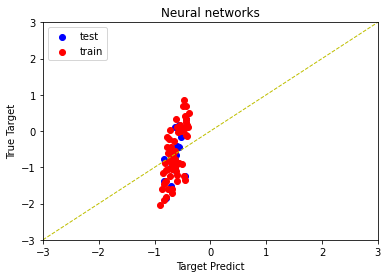

In [156]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('Neural networks')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

### Try 1 hidden layer with 2 hidden unit

In [173]:
r2_train = []
r2_test = []
param = []

for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.1, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [2],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs',
                              max_iter = 20000).fit(X_train_scaled, y_train)
        train_score = mlpreg.score(X_train_scaled,y_train)
        test_score =  mlpreg.score(X_test_scaled,y_test)
        r2_train.append(train_score)
        r2_test.append(test_score)
        param.append(thisactivation+str(thisalpha))

tanh_list_train = r2_train[0:9]
tanh_list_test = r2_test[0:9]
relu_list_train = r2_train[9:]
relu_list_test = r2_test[9:]    

df_result = pd.DataFrame({"train scores (tanh) ":tanh_list_train, "test score (tanh)":tanh_list_test,
                          "train scores (relu) ":relu_list_train, "test score (relu)":relu_list_test}, 
                         index = ["alpha 0.1","alpha 1.0","alpha 2.0","alpha 5.0","alpha 6.0","alpha 7.0","alpha 8.0","alpha 9.0", "alpha 10.0"] )
df_result

,train scores (tanh),test score (tanh),train scores (relu),test score (relu)
alpha 0.1,0.730575,0.384663,6.077056e-01,0.327246
alpha 1.0,0.582545,0.435551,5.901148e-01,0.407524
alpha 2.0,0.533377,0.422577,-9.625012e-11,-0.034321
alpha 5.0,0.422021,0.325646,4.357018e-01,0.324654
alpha 6.0,0.385439,0.290074,4.027142e-01,0.293139
alpha 7.0,0.348361,0.255061,3.682428e-01,0.261920
alpha 8.0,0.310434,0.220556,3.323245e-01,0.230512
alpha 9.0,0.252174,0.174666,2.942829e-01,0.198743
alpha 10.0,0.212721,0.140163,2.539968e-01,0.165908


<AxesSubplot:>

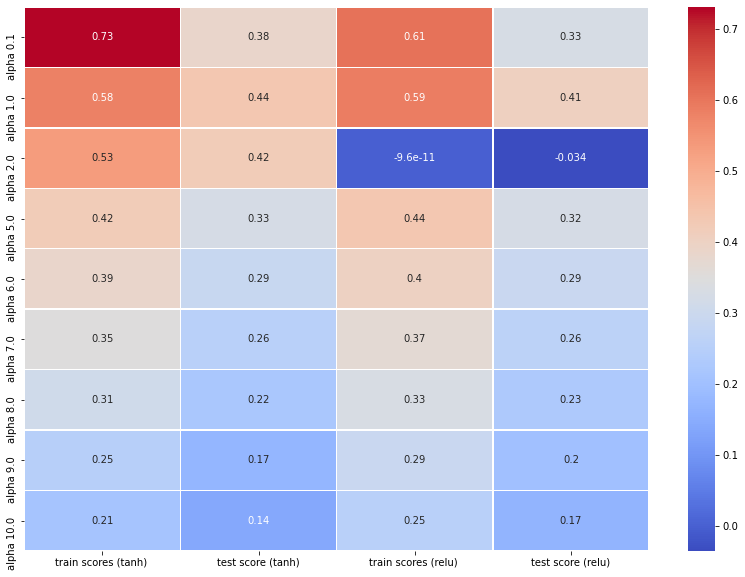

In [174]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Try 1 hidden layer with 3 hidden unit

In [175]:
r2_train = []
r2_test = []
param = []

for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.1, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [3],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs',
                              max_iter = 20000).fit(X_train_scaled, y_train)
        train_score = mlpreg.score(X_train_scaled,y_train)
        test_score =  mlpreg.score(X_test_scaled,y_test)
        r2_train.append(train_score)
        r2_test.append(test_score)
        param.append(thisactivation+str(thisalpha))

tanh_list_train = r2_train[0:9]
tanh_list_test = r2_test[0:9]
relu_list_train = r2_train[9:]
relu_list_test = r2_test[9:]    

df_result = pd.DataFrame({"train scores (tanh) ":tanh_list_train, "test score (tanh)":tanh_list_test,
                          "train scores (relu) ":relu_list_train, "test score (relu)":relu_list_test}, 
                         index = ["alpha 0.1","alpha 1.0","alpha 2.0","alpha 5.0","alpha 6.0","alpha 7.0","alpha 8.0","alpha 9.0", "alpha 10.0"] )
df_result

,train scores (tanh),test score (tanh),train scores (relu),test score (relu)
alpha 0.1,0.853992,-0.492679,0.636067,0.329052
alpha 1.0,0.577670,0.436095,0.589959,0.407443
alpha 2.0,0.533082,0.422942,0.533899,0.413507
alpha 5.0,0.426484,0.325699,0.435685,0.324293
alpha 6.0,0.391004,0.291219,0.403001,0.293428
alpha 7.0,0.354878,0.257608,0.368354,0.261953
alpha 8.0,0.317492,0.224144,0.332363,0.230457
alpha 9.0,0.271511,0.186481,0.294176,0.198630
alpha 10.0,0.238678,0.156992,0.254082,0.165944


<AxesSubplot:>

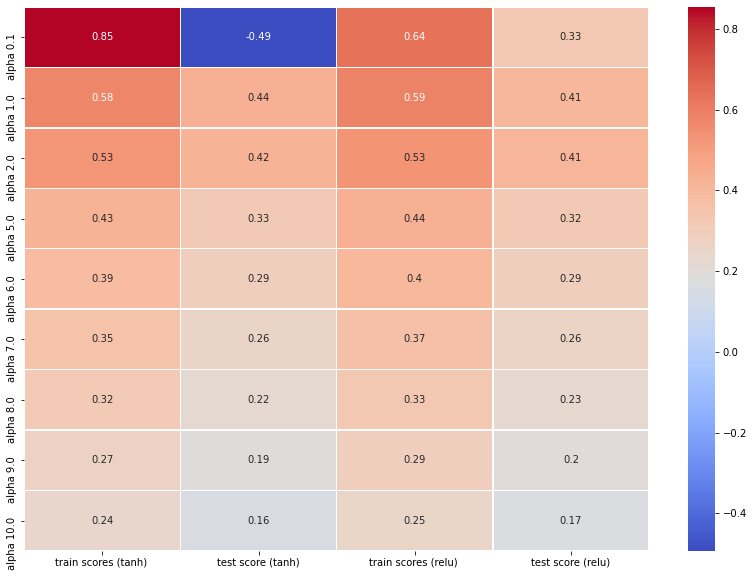

In [176]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

# K-Nearest Neighbors --------Regression

## Cross validation

In [157]:
from sklearn.neighbors import KNeighborsRegressor

In [184]:

my_k = [1,2,3, 10,11,12, 15,25,35]
cv_scores_mean = []

for this_k in my_k:
    knnreg = KNeighborsRegressor(n_neighbors = this_k).fit(X_train, y_train)
    cv_scores = cross_val_score(knnreg,X_train,y_train,cv=5,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.011549086487884663,
 0.10577439614134461,
 0.04597264851357623,
 0.1601694299607423,
 0.17917117259820992,
 0.17056726244581893,
 0.15654007466961564,
 0.1415163802714125,
 0.08766787126893572]

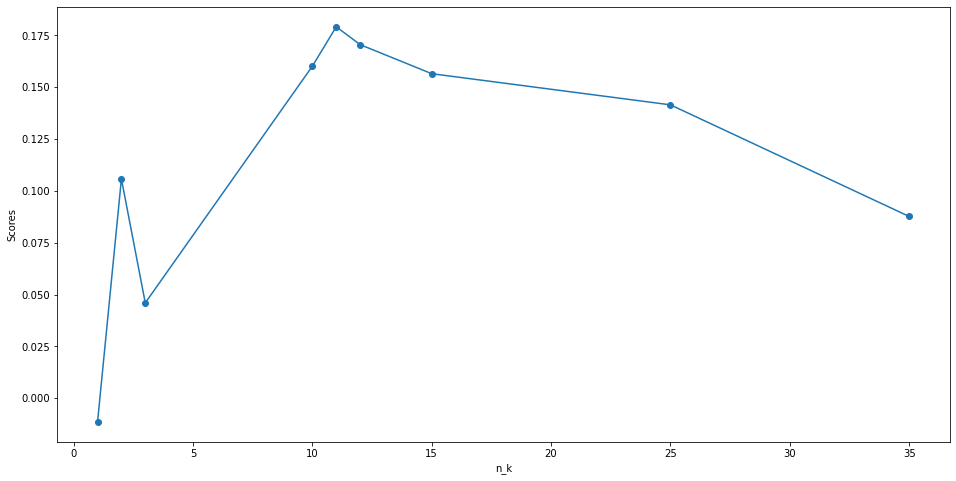

In [185]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_k, cv_scores_mean, '-o')
plt.xlabel("n_k")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [159]:

knnreg = KNeighborsRegressor(n_neighbors = 11).fit(X_train, y_train)
score_train = knnreg.score(X_train, y_train)
score_test = knnreg.score(X_test, y_test)
print('K = ' +str(11))
print('R-squared train score: {:.3f}'
         .format(score_train))
print('R-squared test score: {:.3f}'
         .format(score_test))

K = 11
R-squared train score: 0.309
R-squared test score: 0.149


In [160]:
y_predict_test = knnreg.predict(X_test)
#y_predict_test

In [161]:
y_predict_train = knnreg.predict(X_train)
#y_predict_train

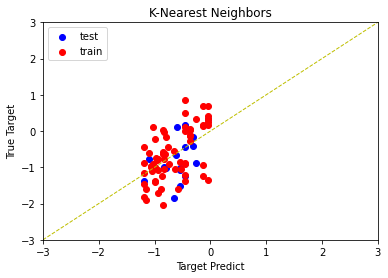

In [162]:
%matplotlib inline
plt.figure()
plt.scatter(y_predict_test, y_test, c = "blue", label = "test")
plt.scatter(y_predict_train, y_train, c = "red", label = "train")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('Target Predict')
plt.ylabel('True Target')
plt.title('K-Nearest Neighbors')
plt.legend()
plt.axline((0, 0), (1, 1), linewidth=1, color='y', ls="--")

plt.show()

In [188]:
X.to_csv('X_from007.csv')

In [189]:
y.to_csv('y_from007.csv')b

In [174]:
X.columns[0]

'BCUT_PEOE_1'

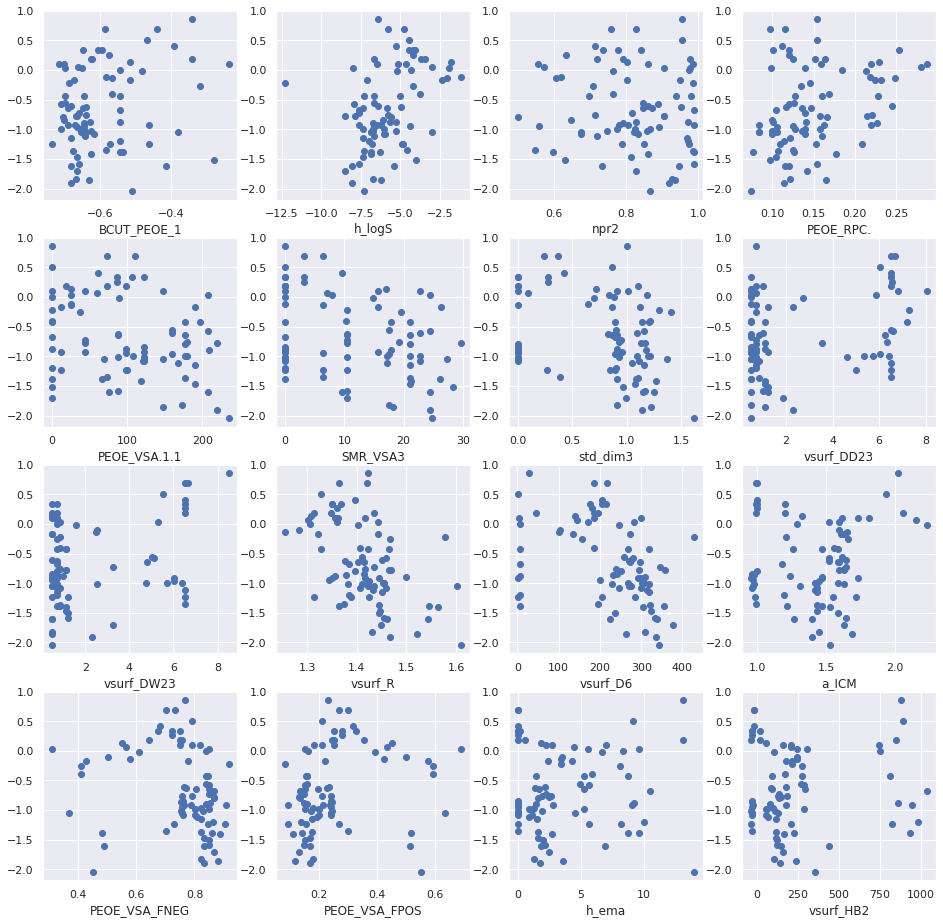

In [177]:
%matplotlib inline
# Setting seaborn as default style even if use only matplotlib
sns.set()
fig, axes = plt.subplots(4, 4, figsize=(16,16))
#fig.suptitle('Exploratory Data')
axes_list = [axes[0][0],axes[0][1],axes[0][2],axes[0][3],
             axes[1][0],axes[1][1],axes[1][2],axes[1][3],
            axes[2][0],axes[2][1],axes[2][2],axes[2][3],
            axes[3][0],axes[3][1],axes[3][2],axes[3][3]]
for i in range(16):
    axes_list[i].scatter(X.iloc[:,i],y)
    axes_list[i].set(xlabel=X.columns[i])
plt.savefig("Exploratory Data")

<AxesSubplot:>

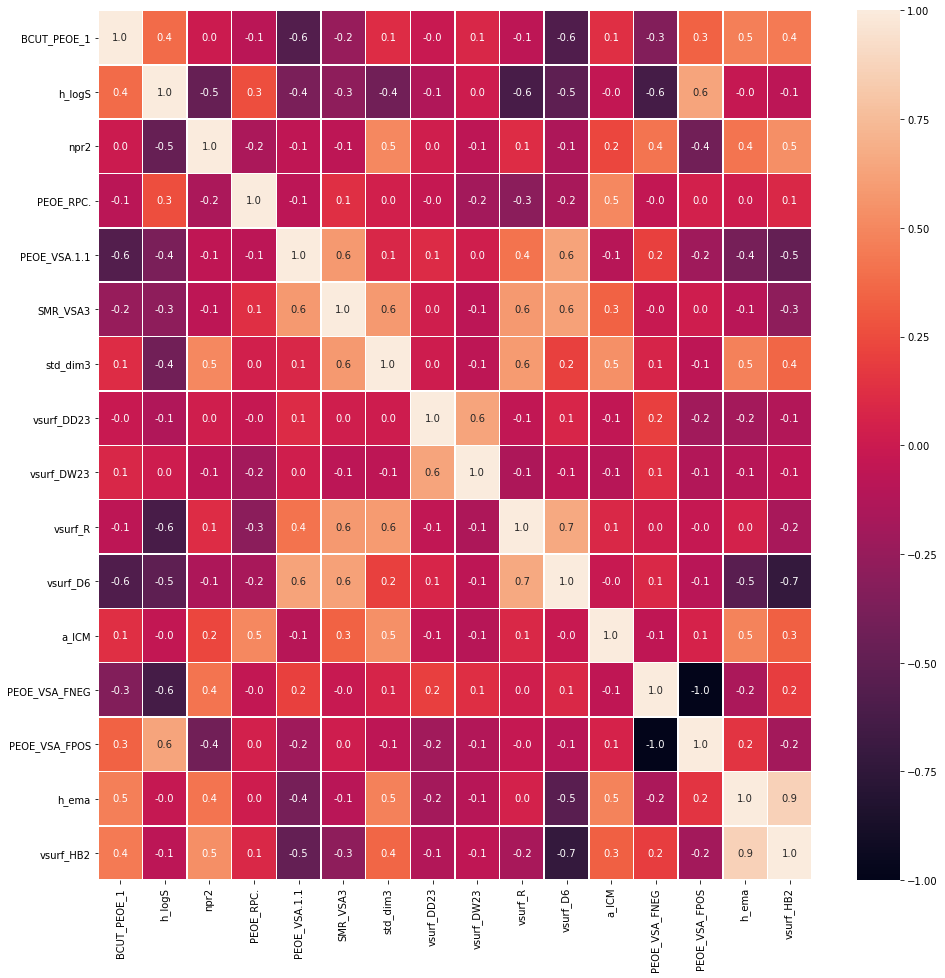

In [168]:
%matplotlib inline
f, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(X.corr(), annot = True, linewidth = 0.5, fmt =".1f", ax=ax)